Precargando datos de la base de datos MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2022-11-15 11:37:35.385000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Mostrando algún dato

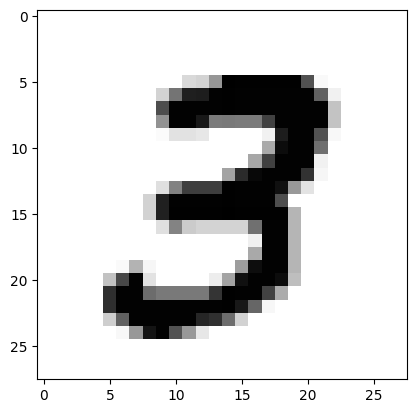

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[7], cmap=plt.cm.binary)

In [3]:
print(x_train.ndim)
print(x_train.shape)
print(x_train.dtype)

3
(60000, 28, 28)
uint8


Normalizando input vector a flot

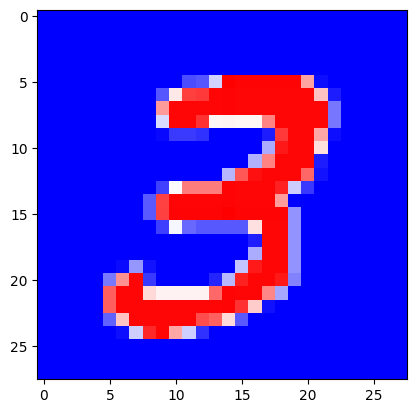

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

plt.imshow(x_train[7], cmap=plt.cm.bwr)

Convertimos ahora cada vector 2D a un vector 1D para meterlo como entrada de la red neuronal


In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test_original = x_test
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

Pasamos a categorical: un número se codifica como un array donde la entrada correspondiente a dicho número es un 1

In [6]:
from tensorflow.keras.utils import to_categorical

print(y_train[:10])
print("... pasaría a...")

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
... pasaría a...
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Definiremos ahora la red neuronal en keras

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# estructura que permite una RN básica
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# parámetros que se muestran:
# primera capa: (784 pixeles+1 sesgo) * 10
# segunda capa (10 + 1 sesgo) * 10
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


2022-11-15 11:37:47.291989: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#configuración del proceso de aprendizaje

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

#entrenamiento del modelo

history = model.fit(x_train, y_train, epochs=5)

history.history

Epoch 1/5
1875/1875 [==============================] - 2s 897us/step - loss: 1.9101 - accuracy: 0.5414
Epoch 2/5
1875/1875 [==============================] - 2s 852us/step - loss: 1.3018 - accuracy: 0.7597
Epoch 3/5
1875/1875 [==============================] - 2s 801us/step - loss: 0.9476 - accuracy: 0.8176
Epoch 4/5
1875/1875 [==============================] - 1s 783us/step - loss: 0.7525 - accuracy: 0.8469
Epoch 5/5
1875/1875 [==============================] - 2s 805us/step - loss: 0.6371 - accuracy: 0.8640


{'loss': [1.910059928894043,
  1.3017560243606567,
  0.9476338624954224,
  0.7524614334106445,
  0.6370978355407715],
 'accuracy': [0.541366696357727,
  0.7597333192825317,
  0.817550003528595,
  0.8468666672706604,
  0.8639500141143799]}

In [9]:
# evaluación del modelo

test_loss, test_acc = model.evaluate(x_test, y_test)

print("loss", test_loss)
print("accuracy", test_acc)

313/313 [==============================] - 0s 683us/step - loss: 0.5779 - accuracy: 0.8781
loss 0.5778926014900208
accuracy 0.8780999779701233


313/313 [==============================] - 0s 600us/step


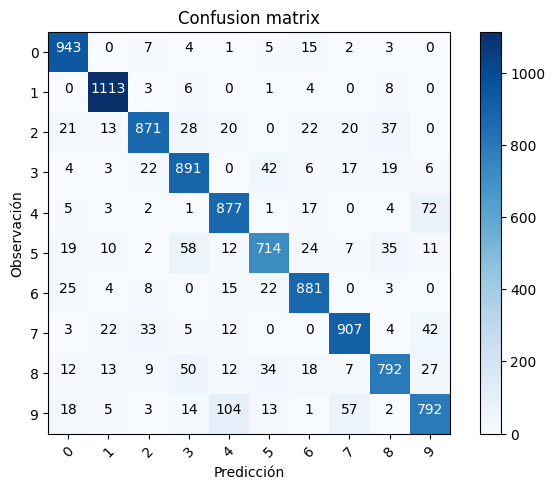

In [10]:
import numpy as np

# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

#cálculo de matriz de confusión

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

1/1 [==============================] - 0s 19ms/step
chape (1, 784)
probabilidades de todos los numeros [[0.12019862 0.01346345 0.66352415 0.06886553 0.00970274 0.01710653
  0.06484324 0.00751906 0.02939343 0.00538325]]
indice con mayor probabilidad 2


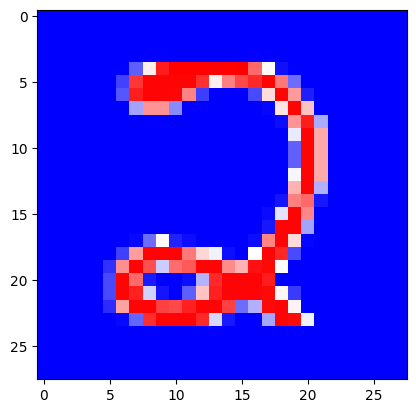

In [11]:
# Generando predicciones, por ejemplo, miramos el siguiente número y vemos si lo predice bien
plt.imshow(x_test_original[72], cmap=plt.cm.bwr)

predictions= model.predict(x_test[72:73])

print("chape", x_test[72:73].shape)
print("probabilidades de todos los numeros",predictions)
print("indice con mayor probabilidad", np.argmax(predictions))

Ahora pruebo a mi rollo

Accuracy: 0.8780999779701233
shape (1, 784)
1/1 [==============================] - 0s 19ms/step
above image is 3
probabilities [0.00982391 0.00516915 0.02487643 0.71867675 0.00662546 0.09724755
 0.00230654 0.01710319 0.09449925 0.02367175]
sum of predictions 0.99999994


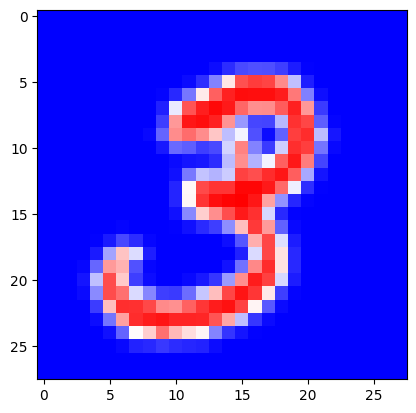

In [14]:
import numpy as np
from skimage import io
from skimage.transform import resize

url = "https://programmer.ink/images/think/c080fb939e166165e5f25d63cbf0e86e.jpg"

image = io.imread(url, as_gray=True)
image = resize(image, (28, 28))

# imagen ya está cargada como floats
array = image #(np.array(image).squeeze().astype('float32') / 255.0)

plt.imshow(array, cmap=plt.cm.bwr)

print("Accuracy:", test_acc)

img_input = array.reshape(1, array.shape[0] * array.shape[1])

#print("array", img_input)
print("shape", img_input.shape)

predictions = model.predict(img_input)

print("above image is", np.argmax(predictions[0]))
print("probabilities", predictions[0])
print("sum of predictions", np.sum(predictions[0]))

